In [1]:
from google.colab import drive, output
drive.mount('/content/drive')
import sys
!pip install torchaudio
!pip install pythae
output.clear()
#%pdb on

%load_ext autoreload
%autoreload 1
%cd '/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project'
#sys.path.append('/content/drive/MyDrive/Deep Learning/AutoEncoders/Project/VQVAE_Working/data')
#sys.path.append('/content/drive/MyDrive/Deep Learning/AutoEncoders/Project/VQVAE_Working/models')
sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Dataloader')
sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Models')
sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Modules')

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import torchaudio.transforms as audio_transform
import pythae
from pythae.pipelines import TrainingPipeline
from pythae.models import VQVAE, VQVAEConfig
from pythae.models import VAE, VAEConfig
from pythae.models import VAE_LinNF, VAE_LinNF_Config
from pythae.models import AE, AEConfig
from pythae.models import MIWAE, MIWAEConfig
from pythae.trainers import BaseTrainerConfig

from Pythae_DataLoader import SoundscapeData
from Pythae_Models import Encoder
from Pythae_Models import Decoder


/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project


In [2]:
Encoder = Encoder(1, 128)
Decoder = Decoder(128, 1)

/usr/local/lib/python3.7/dist-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [3]:
my_training_config = BaseTrainerConfig(
    output_dir='my_model_VQVAE',
    num_epochs=3,
    learning_rate=1e-3,
    batch_size=12,
    steps_saving=None
)

In [3]:
my_vae_config = model_config = VQVAEConfig(
    input_dim=(1, 515, 515),
    latent_dim=256,
)



In [4]:
my_vae_model = VQVAE(
    model_config=my_vae_config
)

In [5]:
pipeline = TrainingPipeline(
    training_config=my_training_config,
    model=my_vae_model
)

In [8]:
root_path = '/content/drive/Shareddrives/ConservacionBiologicaIA/Datos/Jaguas_2018'


dataset = SoundscapeData(root_path, audio_length=12, ext="wav", win_length=1028)
dataset_train, dataset_test = random_split(dataset,
                                           [round(len(dataset)*0.7), len(dataset) - round(len(dataset)*0.7)], 
                                           generator=torch.Generator().manual_seed(1024))

In [9]:
iterator = iter(dataset_train)
dictado = next(iterator)
type(dictado.data)
dictado.data.shape

torch.Size([1, 515, 515])

In [8]:
pipeline(
    train_data=dataset_train, # must be torch.Tensor or np.array
    eval_data=dataset_test# must be torch.Tensor or np.array
)


Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Checking eval dataset...
INFO:pythae.pipelines.training:Checking eval dataset...
Using Base Trainer

INFO:pythae.pipelines.training:Using Base Trainer

Model passed sanity check !

INFO:pythae.trainers.base_trainer.base_trainer:Model passed sanity check !

Created my_model_VQVAE/VQVAE_training_2022-10-16_15-24-39. 
Training config, checkpoints and final model will be saved here.

INFO:pythae.trainers.base_trainer.base_trainer:Created my_model_VQVAE/VQVAE_training_2022-10-16_15-24-39. 
Training config, checkpoints and final model will be saved here.

Successfully launched training !

INFO:pythae.trainers.base_trainer.base_trainer:Successfully launched training !



Training of epoch 1/3:   0%|          | 0/1171 [00:00<?, ?batch/s]

Eval of epoch 1/3:   0%|          | 0/502 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 1420697.9903
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 1420697.9903
Eval loss: 2216867.4124
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 2216867.4124
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/3:   0%|          | 0/1171 [00:00<?, ?batch/s]

Eval of epoch 2/3:   0%|          | 0/502 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 2537042.5645
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 2537042.5645
Eval loss: 2344237.0925
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 2344237.0925
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/3:   0%|          | 0/1171 [00:00<?, ?batch/s]

Eval of epoch 3/3:   0%|          | 0/502 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 1726214.101
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 1726214.101
Eval loss: 1232520.5832
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 1232520.5832
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in my_model_VQVAE/VQVAE_training_2022-10-16_15-24-39/final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in my_model_VQVAE/VQVAE_training_2022-10-16_15-24-39/final_model


## Using the trained model and samplers

In [5]:
import os
from pythae.models import AutoModel

In [6]:
last_training = sorted(os.listdir("my_model_VQVAE"))[-1]
trained_model = AutoModel.load_from_folder(os.path.join("my_model_VQVAE", last_training, "final_model"))

In [53]:
trained_model = trained_model.to("cpu")

In [66]:
a = trained_model.encoder(dictado.data)
a[0][0]
b = trained_model.decoder(a[0])
b[0].shape

torch.Size([1, 1, 515, 515])

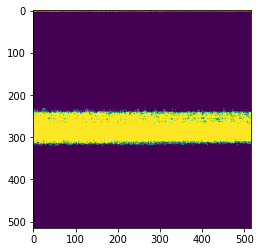

In [68]:
c = b[0].detach().numpy()
plt.imshow(c[0,0,:])

In [35]:
# Define your sampler
from pythae.samplers import NormalSampler
my_samper = NormalSampler(
model=trained_model
)
# Generate samples
gen_data = my_samper.sample(
num_samples=12,
batch_size=10,
output_dir=None,
return_gen=True
)

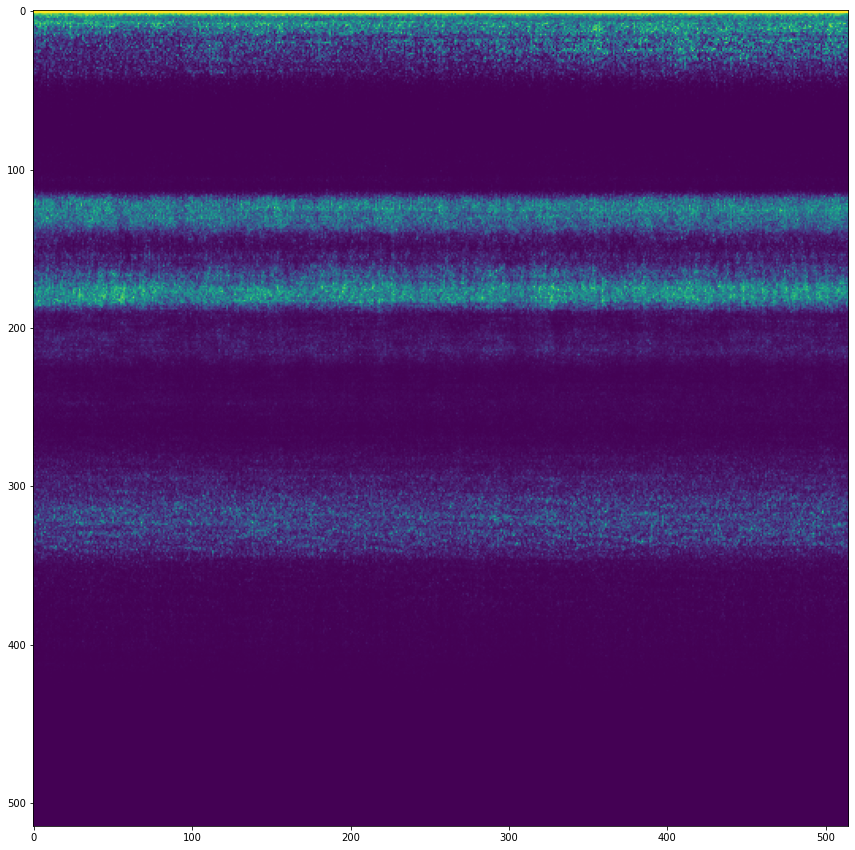

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.imshow(gen_data[0,0,:].to("cpu"))

## Using wandb logging

In [ ]:
from pythae.trainers.training_callbacks import WandbCallback

callbacks = [] # the TrainingPipeline expects a list of callbacks

wandb_cb = WandbCallback() # Build the callback 

# SetUp the callback 
wandb_cb.setup(
    training_config=training_config, # training config
    model_config=model_config, # model config
    project_name="your_wandb_project", # specify your wandb project
    entity_name="your_wandb_entity", # specify your wandb entity
)

callbacks.append(wandb_cb) # Add it to the callbacks list